<a href="https://colab.research.google.com/github/Spookytober/Datascience/blob/main/Aubr_OrfU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 2 Project: Flipping Metaphorical Coins

**Task**:

Two parts:

1. Propose a data set that's compatible with a pymc betabinomial model. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a betabinomial model using pymc within the colab environment, on a data set of your choice.

In [ ]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


I'll be analyzing the positive and negative reviews of Steam reviews of Celeste, one of my favorite video games. Celeste is a fairly popular indie platformer game.

In [ ]:
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

Celeste is one of the best games I have ever played, and around 95% of the people I've talked to have enjoyed it enough to give it a positive review.
I've talked to approximately 50 people about celeste, so that would mean about 48 people out of those 50 liked the game.

Our prior Beta distribution should then have a mean of that percentage.

<Axes: >

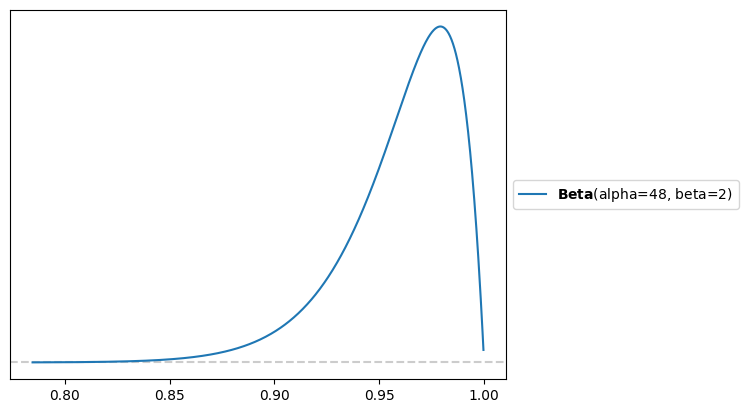

In [ ]:
# Here is the prior Beta Distribution.
pz.Beta(alpha = 48, beta = 2).plot_pdf()

According to SteamDB, Celeste has 103,565 positive reviews and 2,663 negative reviews.

In [ ]:
# Creating a celeste reviews variable.

# Positive reviews from Steam
Celeste_pos = np.repeat(1,103565)

# Negative reviews from Steam
Celeste_neg = np.repeat(0,2663)

# This "Celeste_reviews" variable is now an array of 103565 1s and 2663 0s.
Celeste_reviews = np.concatenate([Celeste_pos,Celeste_neg])
# I know there was a faster way of doing that in one line of code, but this makes far more sense to me visually.

In [ ]:
# Now to use pymc. Model-making time!
with pm.Model() as Celeste_Model:
  #The prior
  θ = pm.Beta('θ', alpha = 48., beta = 2.)
  #The likelihood using Bernoulli
  y = pm.Bernoulli('y', p = θ, observed = Celeste_reviews)
  #The next bit is sampling the posterior. I'm going to grab 1000 samples.
  idata_Celeste = pm.sample(1000)

<Axes: title={'center': 'θ'}>

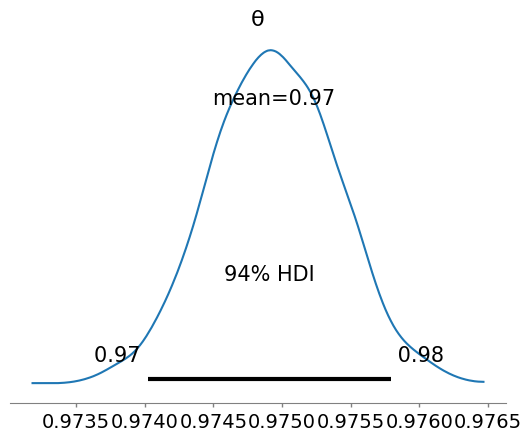

In [ ]:
#I'm going to plot these samples now.
az.plot_posterior(idata_Celeste)

The above graph is the posterior to our data, and to word it in plain english, it is the probability that someone will leave a positive review on Celeste given the data.

These results make sense to me, especially since the mode of this graph is almost exactly 0.975. This is only a little bit higher than my prior (which was $\frac {48}{50}$ or 0.96).

On the Celeste steam page, the game is categorized as "Overwhelmingly Positive" and does in fact have a 97.5% positive review rate.

One shortcoming of this analysis here is that my prior of $\frac{48}{50}$ was nearly insignificant compared to the data of $\frac {103565}{106228}$. When added into the mass of over a hundred thousand, 50 doesn't change the numbers much, so my posterior ended up not really including my prior. This does mean that my results were almost entirely based off of real data, which could mean that the posterior is more sound.


To conclude: The probability that someone will give Celeste a positive review is 97.5% (knowing nothing about the person other than that they have played the game).